In [1]:
from plot_T2output import *
import os


old_path = os.getcwd()




In [2]:
os.chdir(old_path)
path = 'sample_files/sample_T2Well_ECO2M/'
os.chdir(path)

raw_names = tuple([r'fflow', r'fstatus', r'coft', r'foft'])
fnames = []
plot_bool = dict()
fnames_map=dict()

for f in os.listdir():
    if f.lower().startswith(raw_names):
        f_size = os.path.getsize(f)
        if f_size>0:
            fnames.append(f)
            flabel = f.lower().split('_')[0]
            fnames_map[flabel]=f
            plot_bool[flabel] = True

    elif f.endswith(tuple(['.in', '.inp'])):
        ip_file = f

    elif f.endswith('out'):
        op_file = f


EOS = get_EOS(op_file)
print('Input file: {:s}'.format(ip_file))
print('EOS version: {:s}'.format(EOS))

eleme, conne = read_ipMESH(ip_file)



Input file: Injection_1km_5bar_1kg.inp
EOS version: ECO2F


In [3]:
var, df = read_FFlow(fnames_map['fflow'], EOS)
df

Processing fflow_Injection_1km_5bar_1kg_ 1 file


Variables=WellID          Time  Dis  cumDepth     q_aqueous  \
1 0.001            1.000000e-15 -1.000000e-15  0.0       0.0  0.000000e+00   
  0.001            5.000000e+01 -5.000000e+01  0.0       0.0  3.214875e-16   
  0.001            1.000000e+02 -1.500000e+02  0.0       0.0  4.881163e-16   
  0.001            1.500000e+02 -2.000000e+02  0.0       0.0  4.409145e-16   
  0.001            2.000000e+02 -2.500000e+02  0.0       0.0  5.002346e-16   
...                         ...           ...  ...       ...           ...   
  8640000.000      8.000000e+02 -8.500000e+02  0.0       0.0  9.999968e-01   
  8640000.000      8.500000e+02 -9.000000e+02  0.0       0.0  9.999967e-01   
  8640000.000      9.000000e+02 -9.500000e+02  0.0       0.0  9.999965e-01   
  8640000.000      9.500000e+02 -1.000000e+03  0.0       0.0  9.999964e-01   
  8640000.000      1.000000e+03 -1.050000e+03  0.0       0.0  9.999962e-01   

               q_liquid  q_gas     V_aqueous      V_liquid  V_gas  
1 0.001             0.0    0.0  0.000000e+00  0.000000e+00    0.0  
  0.001             0.0    0.0  1.035730e-15 -1.035730e-15    0.0  
  0.001             0.0    0.0  1.564740e-15 -1.564740e-15    0.0  
  0.001             0.0    0.0  1.406444e-15 -1.406444e-15    0.0  
  0.001             0.0    0.0  1.587821e-15 -1.587821e-15    0.0  
...                 ...    ...           ...           ...    ...  
  8640000.000       0.0    0.0  1.716326e+00 -1.716326e+00    0.0  
  8640000.000       0.0    0.0  1.709341e+00 -1.709341e+00    0.0  
  8640000.000       0.0    0.0  1.702239e+00 -1.702239e+00    0.0  
  8640000.000       0.0    0.0  1.695072e+00 -1.695072e+00    0.0  
  8640000.000       0.0    0.0  3.628802e+00 -3.628802e+00    0.0  

[1386 rows x 10 columns]

In [6]:
fnames_map['fstatus']

'fstatus_Injection_1km_5bar_1kg_ 1'

In [8]:
ip_file = r'fstatus_Injection_1km_5bar_1kg_ 1'

with open(ip_file) as fs:
    next(fs)
    fs_header = next(fs)

fs_header = fs_header.split('=')[1]
fs_header = fs_header.split(",")
fs_header

fstatus = pd.read_csv(ip_file, skiprows=3, names=fs_header)
fstatus = fstatus.apply(pd.to_numeric, errors='coerce')
fstatus = fstatus.fillna(0)

fstatus

,WellID,Time(s),Dis(m),cumDepth(m),S_aqueous,S_liquid,S_gas,XCO2liq(kg/kg),Pres(Pa),T(<sup<o</sup>C),D_aqueous(kg/m<sup>3</sup>),D_liquid(kg/m<sup>3</sup>),D_gas(kg/m<sup>3</sup>)\n
0,1,0.001,0.0,0.0,0.0,0.0,1.0,0.0,2.500000e+06,5.000000,1000.796030,895.021800,58.152394
1,1,0.001,25.0,-25.0,0.0,0.0,1.0,0.0,4.163259e+05,5.625000,1000.100953,890.867240,8.128557
2,1,0.001,75.0,-100.0,0.0,0.0,1.0,0.0,4.203215e+05,6.875000,1000.070908,882.424495,8.169152
3,1,0.001,125.0,-150.0,0.0,0.0,1.0,0.0,4.243370e+05,8.125000,1000.016427,873.737205,8.209707
4,1,0.001,175.0,-200.0,0.0,0.0,1.0,0.0,4.283724e+05,9.375000,999.938452,864.768155,8.250268
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,1,8640000.000,825.0,-850.0,0.0,0.0,1.0,0.0,8.175748e+05,22.373951,998.043830,746.040436,15.320247
1448,1,8640000.000,875.0,-900.0,0.0,0.0,1.0,0.0,8.250144e+05,23.739750,997.722149,728.715675,15.384157
1449,1,8640000.000,925.0,-950.0,0.0,0.0,1.0,0.0,8.324861e+05,25.082583,997.387726,709.960078,15.449203
1450,1,8640000.000,975.0,-1000.0,0.0,0.0,1.0,0.0,8.399988e+05,26.376278,997.049050,689.372108,15.517313


In [ ]:
read_FStatus(ip_file)

In [11]:
def read_FStatus(ip_file):

    """
    Function to parse FStatus file.
    It creates a pandas dataframe
    """
    print('Processing {:s} file'.format(ip_file))

    with open(ip_file) as fs:
        next(fs)
        fs_header = next(fs)
    
    fs_header = fs_header.split('=')[1]
    fs_header = fs_header.split()

    fstatus = pd.read_csv(ip_file, skiprows=3, names=fs_header)
    fstatus = fstatus.apply(pd.to_numeric, errors='coerce')
    fstatus = fstatus.fillna(0)
    fstatus['Pres']/= 1e5


    return fs_header[2:], fstatus

In [7]:
read

,ElName,NSEQ,NADD,MAT,VOLX,AHTX,PMX,X,Y,Z
1,*bA 1,,,wella,1.000000e+52,NaN,NaN,0.000,0.0,0.0
2,1AA 1,,,wellb,1.909300e+00,0.0,0.0,0.000,0.0,-25.0
3,1BA 1,,,wellb,1.909300e+00,0.0,0.0,0.000,0.0,-75.0
4,1CA 1,,,wellb,1.909300e+00,0.0,0.0,0.000,0.0,-125.0
5,1DA 1,,,wellb,1.909300e+00,0.0,0.0,0.000,0.0,-175.0
...,...,...,...,...,...,...,...,...,...,...
65,02A92,,,sand1,1.284300e+07,0.0,0.0,475.387,0.0,-1025.0
66,02A93,,,sand1,1.847900e+07,0.0,0.0,569.983,0.0,-1025.0
67,02A94,,,sand1,2.659100e+07,0.0,0.0,683.498,0.0,-1025.0
68,02A95,,,sand1,3.826800e+07,0.0,0.0,819.716,0.0,-1025.0


In [3]:
test = ['plot_T2output.py', 'sample_files/sample_T2Well_ECO2M/Injection_1km_5bar_1kg.inp', 'fstatus']
plot_specs(test, plot_bool, fnames)

file queried: ['fstatus']
items queried: None
asdasd ['fflow_Injection_1km_5bar_1kg_ 1', 'fstatus_Injection_1km_5bar_1kg_ 1', 'COFT_Injection_1km_5bar_1kg', 'FOFT_Injection_1km_5bar_1kg']


({'fflow_Injection_1km_5bar_1kg_ 1': False,
  'fstatus_Injection_1km_5bar_1kg_ 1': False,
  'COFT_Injection_1km_5bar_1kg': False,
  'FOFT_Injection_1km_5bar_1kg': False},
 {})

In [10]:
plot_bool.keys()

dict_keys(['fflow_Injection_1km_5bar_1kg_ 1', 'fstatus_Injection_1km_5bar_1kg_ 1', 'COFT_Injection_1km_5bar_1kg', 'FOFT_Injection_1km_5bar_1kg'])

In [6]:
any(item.startswith('fstatus') for item in fnames)

True

In [ ]:
path = 'sample_files/sample_T2Well_ECO2M/'
os.chdir(path)





os.chdir(old_path)

In [2]:



ip_file = 'case2.inp'

raw_names = [r'FFlow', r'FStatus', r'COFT', r'FOFT']
fnames = []
op_files = []
plot_bool = dict()

for f in os.listdir(os.getcwd()):
    if f in raw_names:
        f_size = os.path.getsize(f)
        if f_size>0:
            fnames.append(f)
            op_files.append(f)
            plot_bool[f] = True


ffunc = []


parse_dict = dict()

for file in fnames:
    if file=='FFlow':
        parse_dict[file]=read_FFlow
    elif file=='FStatus':
        parse_dict[file]=read_FStatus
    elif file=='COFT':
        parse_dict[file]=read_COFT
    elif file=='FOFT':
        parse_dict[file]=read_FOFT

plot_dict = dict()



In [5]:
os.chdir('/')


PATH_ECO2N = r'/workspaces/T2Well_post/sample_files/sample_T2Well_ECO2N'
PATH_ECO2M = r'/workspaces/T2Well_post/sample_files/sample_T2Well_ECO2M'


In [6]:
os.listdir(PATH_ECO2M)

['fflow_Injection_1km_5bar_1kg_ 1',
 'INCON',
 'SAVE',
 'LINEQ',
 'fstatus_Injection_1km_5bar_1kg_ 1',
 'xyzrock.mesh',
 'WHConds_Injection_1km_5bar_1kg.txt',
 'COFT_Injection_1km_5bar_1kg',
 'CO2TAB',
 'Inj.out',
 'VERS',
 'TABLE',
 'Injection_1km_5bar_1kg.inp',
 'FOFT_Injection_1km_5bar_1kg',
 'MESH',
 'DOFT',
 'GENER']

In [12]:
raw_names = tuple([r'fflow', r'fstatus', r'coft', r'foft'])

plot_bool = dict()

for f in os.listdir(PATH_ECO2M):
    if f.lower().startswith(raw_names):
        plot_bool[f] = True

plot_bool

{'fflow_Injection_1km_5bar_1kg_ 1': True,
 'fstatus_Injection_1km_5bar_1kg_ 1': True,
 'COFT_Injection_1km_5bar_1kg': True,
 'FOFT_Injection_1km_5bar_1kg': True}

Bad pipe message: %s [b'\x8b\x13A:\x85\xdct\x91\x81\xe2\xea\xad\x15\xaf\x90`q\xc1 \xd9C\xd3\x17\xf9\xd0\xf7\xb4\xa4\x94g[', b'\xa6\xa8-\xc2\xe31\x13\xdc,\x01\xf6\xb1"\x916\xd00s\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.', b'0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04\x03']
Bad pipe message: %s [b'\x06\x03\x08\x07', b'\x08\t\x08\n\x08\x0b\x08']
Bad pipe message: %s [b'\x05\x08\x06']
Bad pipe message: %s [b'\x05\x01\x06', b'']
Bad pipe message: %s [b'\x03\x02\x03\x04\x00-\x00\x02\x01\x01\x003\x00&\x00$\x00\x1d\x00 \x8dq\xb1\xa5\n\xd0.\xd5[W\x1d\x03:j^\x86\x91\xf0\xfe\xe7j\x87']
Bad pipe message: %s [b"y;\xdc905\xe2\x05\xc1P\xd6\xe7\xc5\x16P\x8a'\xa2\x00\x00|\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\xac\xc0\xa2\xc0\x9e\

In [13]:
os.getcwd()

'/'

In [14]:
os.listdir(PATH_ECO2N)

['case2.out',
 'INCON',
 'COFT',
 'SAVE',
 'LINEQ',
 'CO2TAB',
 'Thumbs.db',
 'FOFT',
 'VERS',
 'TABLE',
 'MESH',
 'DOFT',
 'FFlow',
 'GENER',
 'FStatus',
 'case2.inp']

In [15]:
os.chdir(PATH_ECO2N)

In [19]:
os.listdir(os.path.dirname('case2.inp'))



FileNotFoundError: [Errno 2] No such file or directory: ''

In [6]:
fstatus_var, fstatus_df = read_FStatus('FStatus')
fflow_var, fflow_df = read_FFlow('FFlow')



Processing FStatus file
Processing FFlow file


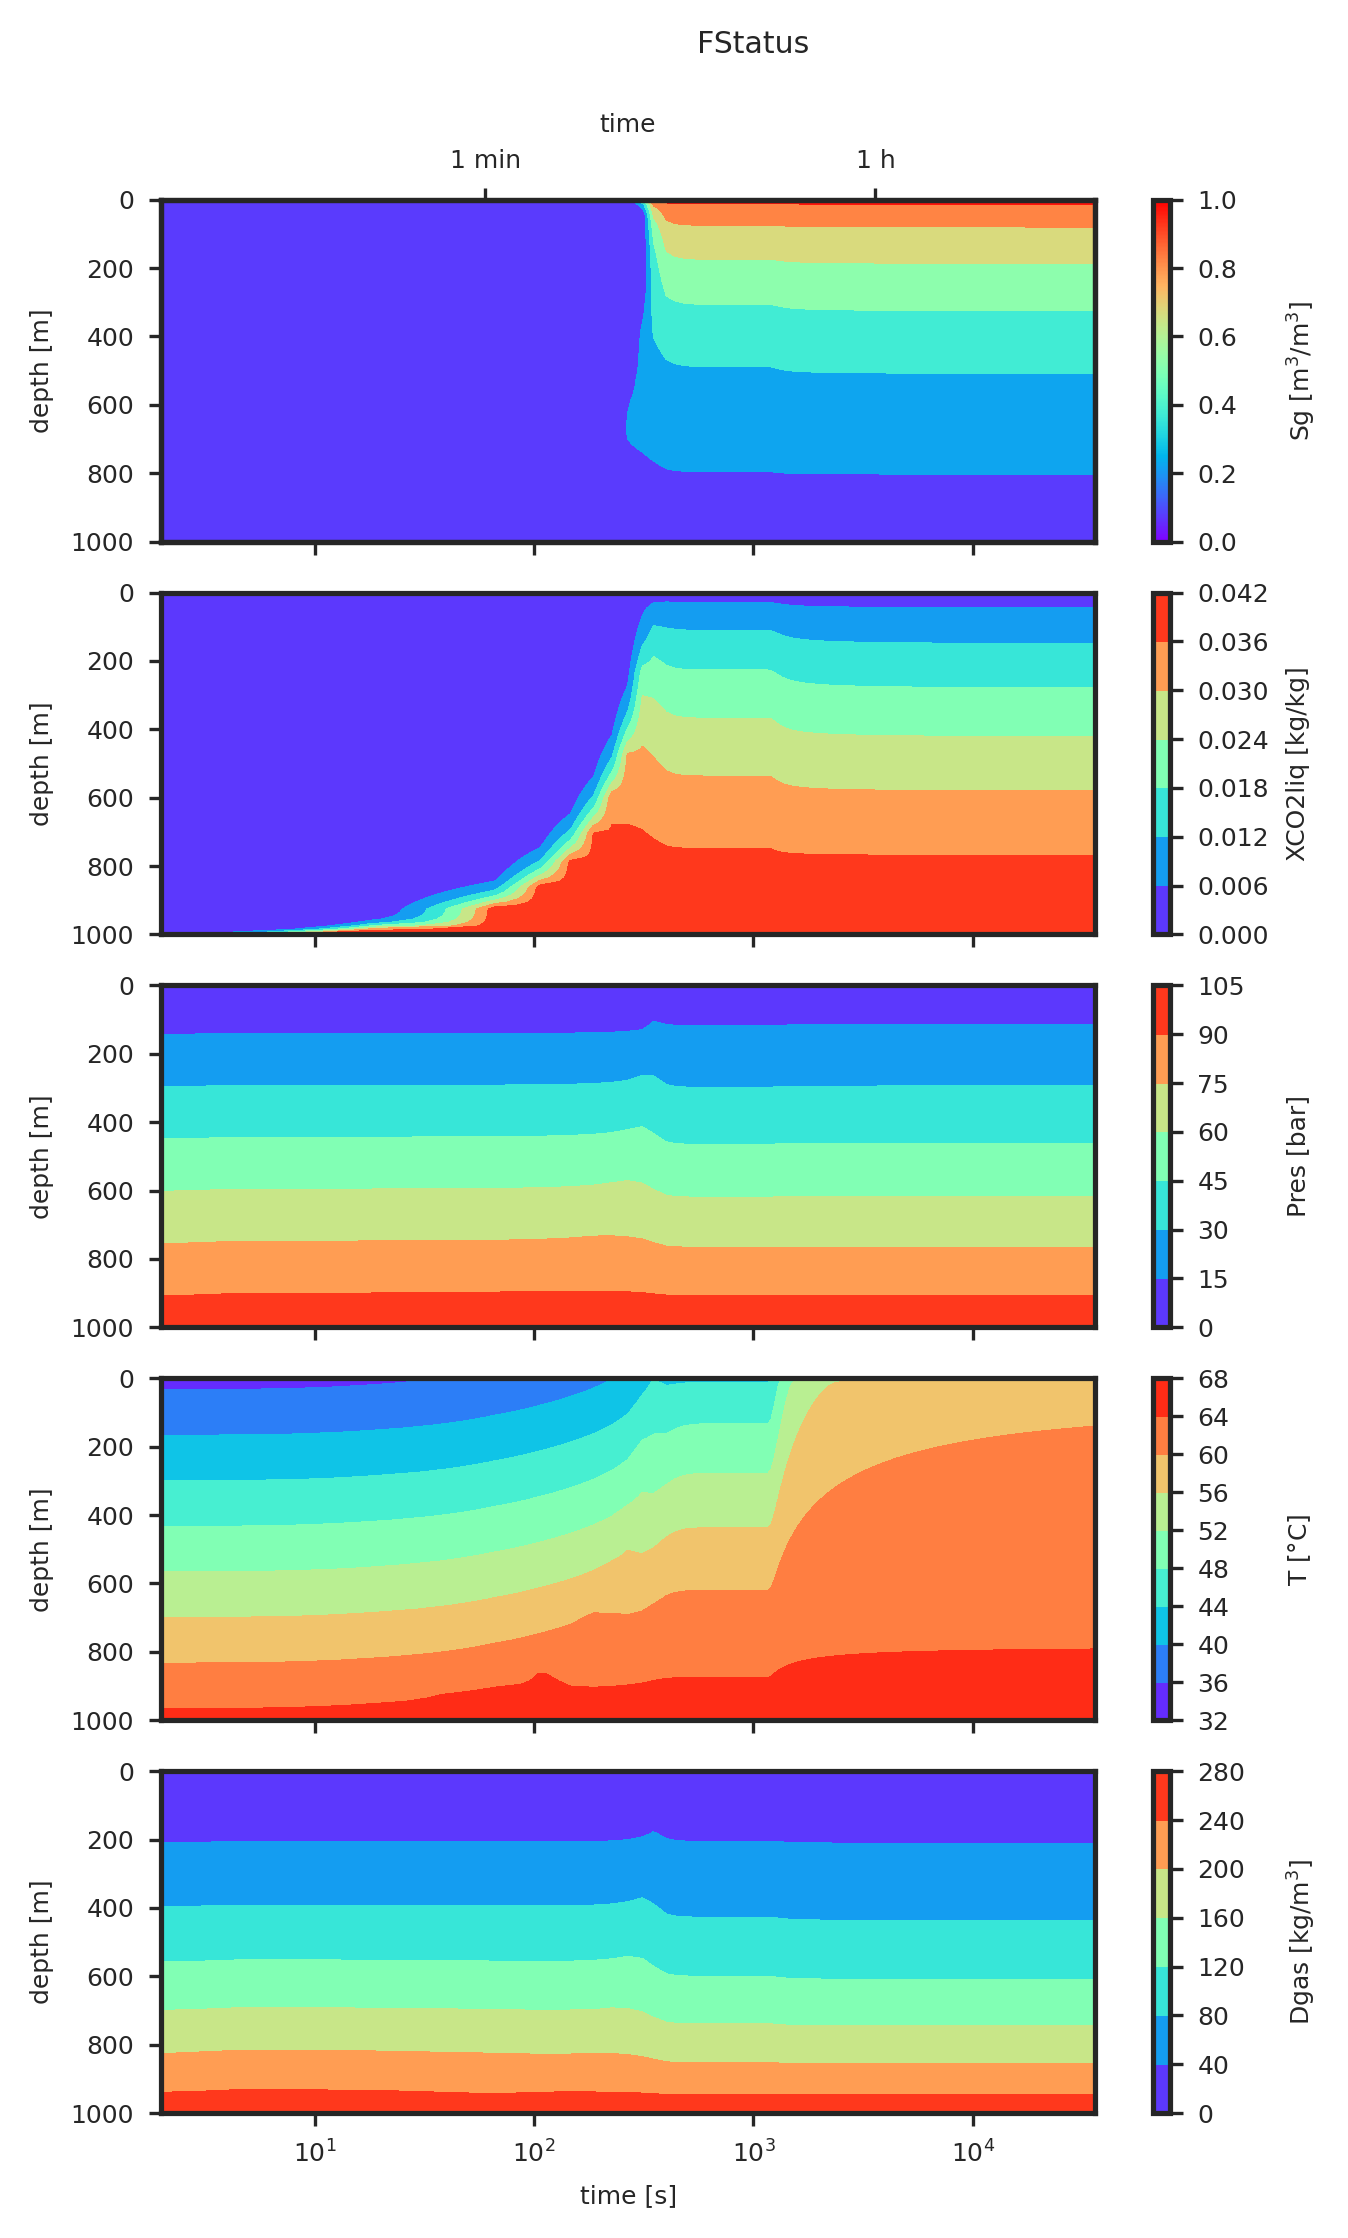

In [7]:
logscale = True

plot_Ffigure('FStatus', fstatus_df, fstatus_var, logscale)

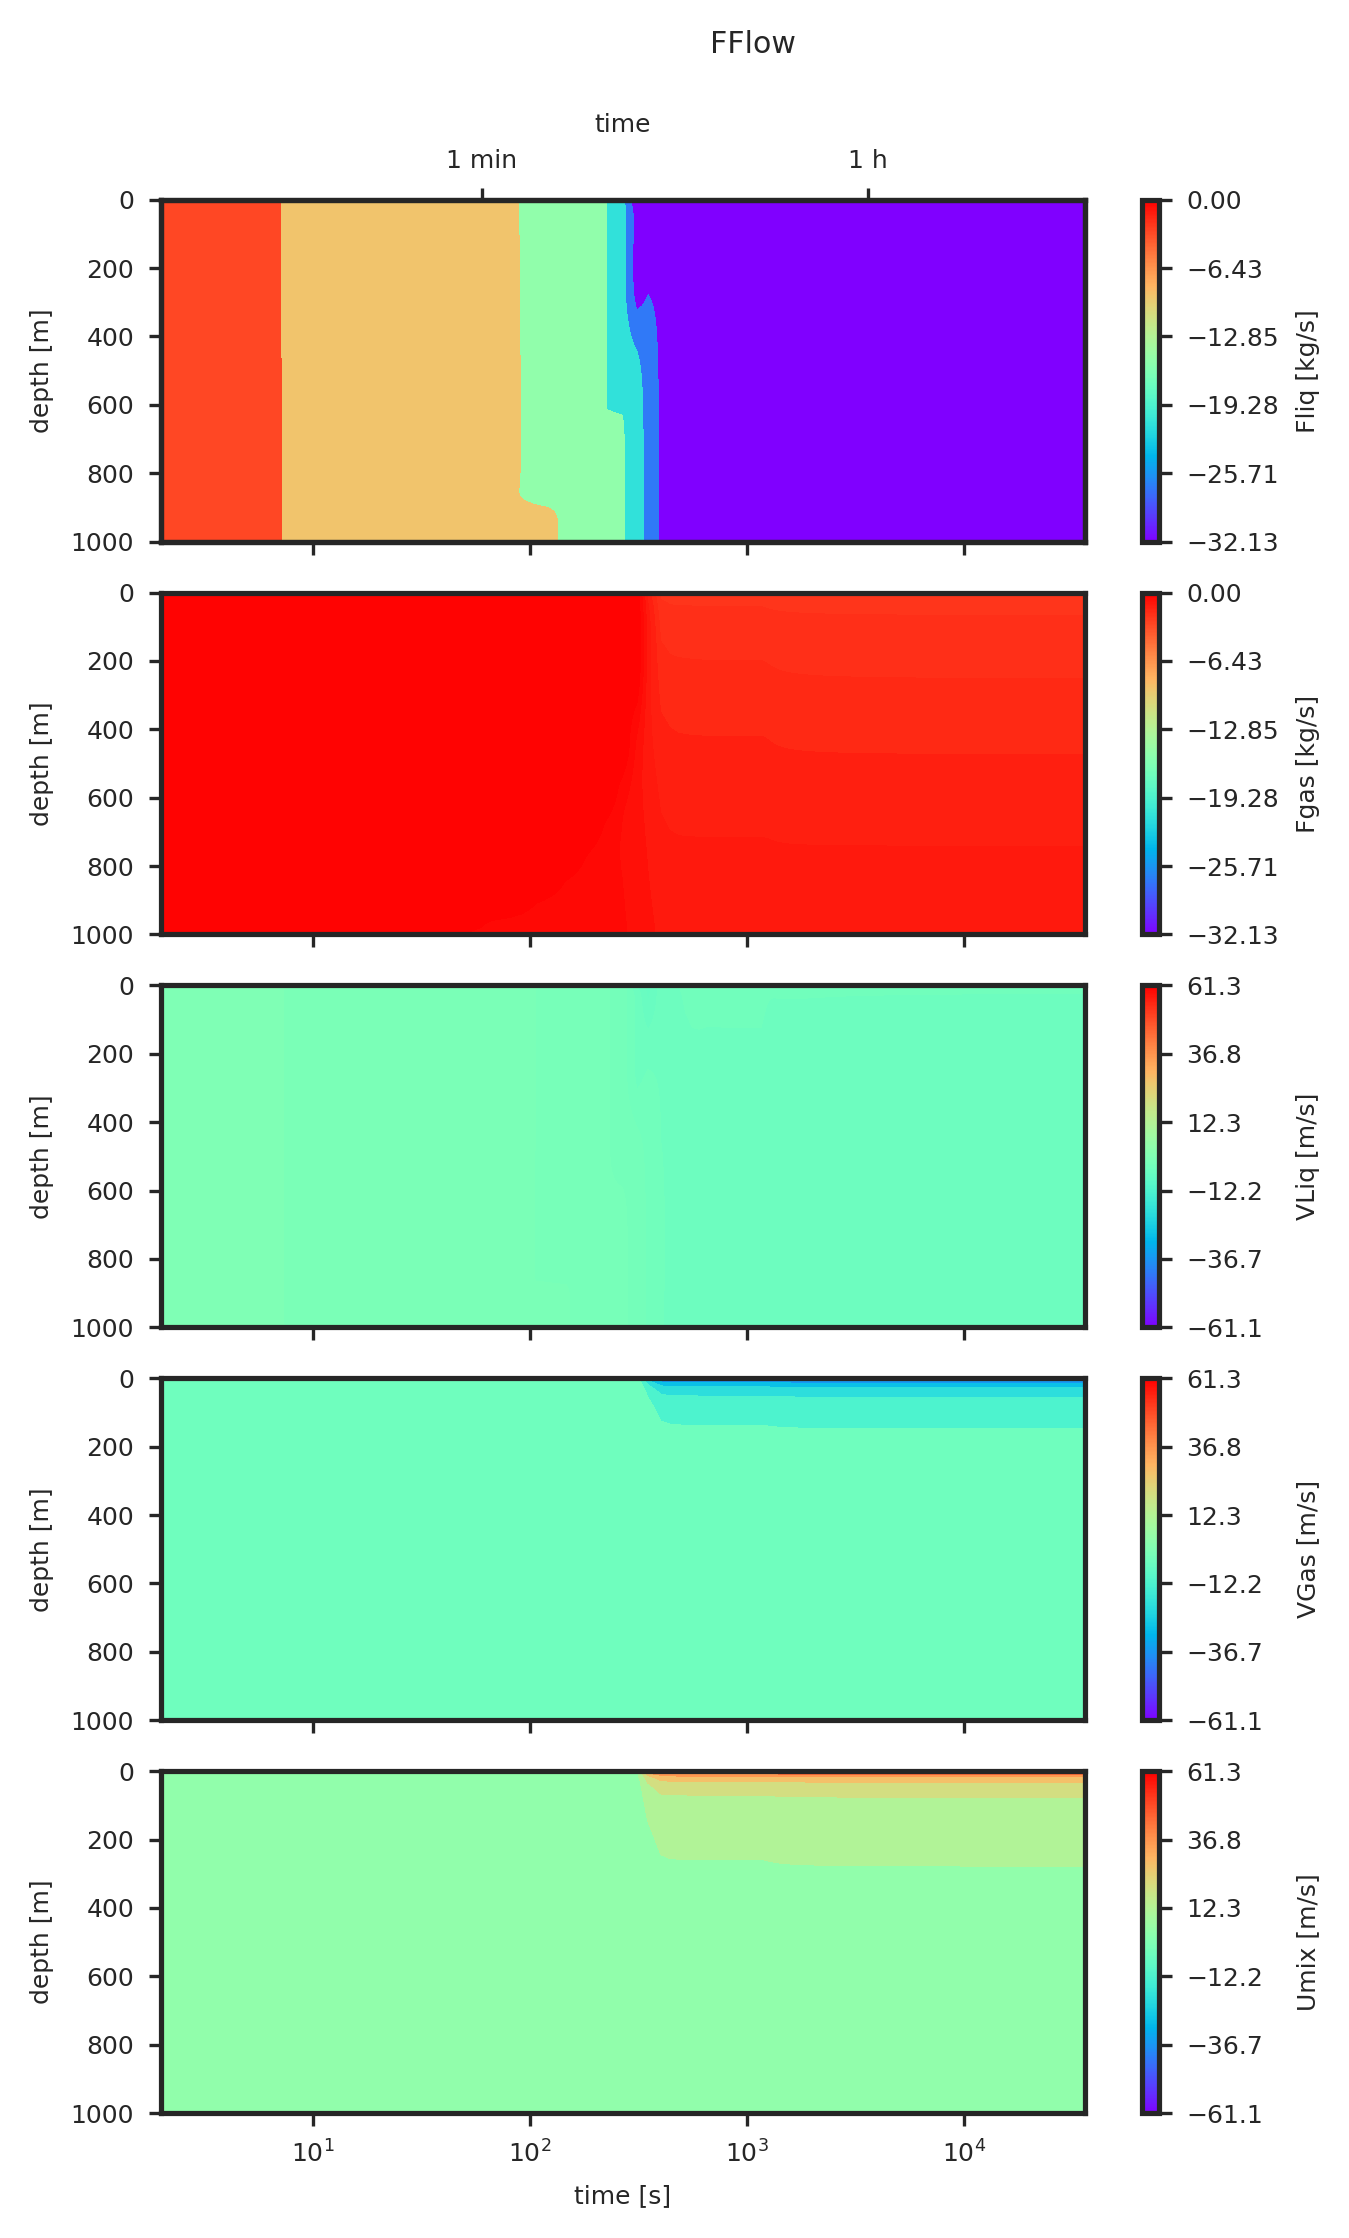

In [8]:
logscale = True

plot_Ffigure('FFlow', fflow_df, fflow_var, logscale)